# Self Organised Maps (SOM)

## Unsupervised learning using Self Organised Maps (SOM)
The SOM functions are implemente in the sompy library.  The sompy libray can be downloaded or cloned from this github page: https://github.com/sevamoo/SOMPY.
Instructions for installation and other details are provided in the same github.

Wikipedia SOM :https://en.wikipedia.org/wiki/Self-organizing_map

Warning for Python3 users: some code in the sompy.py file use "xrange" for some loops. If this error pop up, just edit the sompy.py file of the installed library and change it for "range".
Re-start the kernel and things should work fine.

Warning 2: There is no documentation yet of how to use the library, so reading directly the code is necesary to understand the functionalities (very straigh forward).


In [31]:
import pandas as pd
import time as time
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
import sompy
import loadingADHD_Data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


%matplotlib inline



## Loading Patients Data 

In [32]:
# 1. Load data using the imported script loadingA 

path_dataV2 = path = "/Users/and_ma/Documents/DataScience/UB_DataScience/DataScience_Project/UB_Features_V2/"
patientsDF = loadingADHD_Data.load(path_dataV2)

ApatientsDF = patientsDF[patientsDF['experiment']=='A']
dropApatientsDF = ApatientsDF.drop(['experiment', 'patientName'],1)
BpatientsDF = patientsDF[patientsDF['experiment']=='B']
dropBpatientsDF = BpatientsDF.drop(['experiment', 'patientName'],1)
CpatientsDF = patientsDF[patientsDF['experiment']=='C']
dropCpatientsDF = CpatientsDF.drop(['experiment', 'patientName'],1)
dropPatientsDF = patientsDF.drop(['experiment','patientName'],1)
numberA = len(patientsDF[patientsDF['experiment']=='A'])
numberB = len(patientsDF[patientsDF['experiment']=='B'])
numberC = len(patientsDF[patientsDF['experiment']=='C'])

## Calculating PCA for Multidimentional representation

In [33]:
### Do the PCA decomposition! for the sake of visualisation, only 3 components are considered
pca = PCA(n_components=2)
newdataPCA = pca.fit_transform(dropPatientsDF.values)  # concatenates vectors row by row
print ("PCA performs well with 2 componets, variance of two componets : ",np.sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

PCA performs well with 2 componets, variance of two componets :  0.898206462617


array([ 0.83619435,  0.06201211])

## Calculating Self Organised Mapping 

### Calculating SOM for group A patients


In [34]:
### 1. Get best model for A patients
X_A = dropApatientsDF.values

## Normalising data
#scaler = StandardScaler()
#X_A = scaler.fit_transform(X_A)

mapsize = [50,50]

# Method initialisation
som = sompy.SOMFactory.build(X_A, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods

# Training of the SOM
som.train(n_job=1, verbose=None)  # verbose='debug' will print more, and verbose=None wont print anything

# Performing clustering in the projected mapping
cl = som.cluster(n_clusters=2)

# Projecting the input Data in the Trained SOM
projected=som.project_data(X_A)

# Extrating cluster labels for the inputs, from the projected data
labels = cl[projected]



### Visualising the Mapping in the network

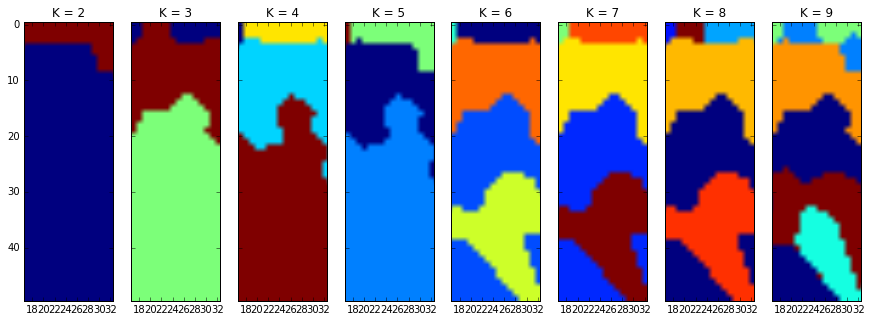

In [35]:
fig = plt.figure()
k_range = 10
N_plots = len(np.arange(2, k_range))
f,ax = plt.subplots(1, N_plots , sharey=True,figsize=(15,5))
for K in np.arange(2, k_range):
    # Perform clustering in the projected mapping
    cl_ = som.cluster(n_clusters=K)
    ax[K-2].set_title("K = %s"%K)
    ax[K-2].imshow(cl_.reshape(50,50))
    

plt.show() 

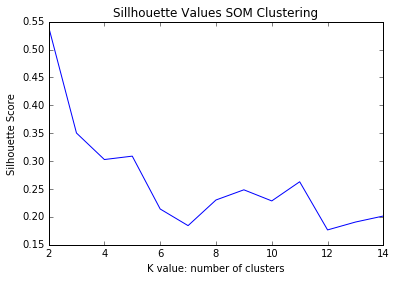

In [36]:
#print(metrics.silhouette_score(X_A, labels_3,  metric='euclidean'))
silhouette = []
for K in np.arange(2, 15):
    
    # Perform clustering in the projected mapping
    cl_ = som.cluster(n_clusters=K)

    # Projecting the input Data in the Trained SOM
    projected_=som.project_data(X_A)

    # Extrating cluster labels for the inputs, from the projected data
    labels_ = cl_[projected]
    
    m = metrics.silhouette_score(X_A, labels_, metric='euclidean')
    silhouette.append(m)
    #print('K = ', K)
    #print('Silhouette %.2f' % m)

plt.plot(np.arange(2,15),np.array(silhouette),color='b')
plt.title("Sillhouette Values SOM Clustering")
plt.xlabel("K value: number of clusters")
plt.ylabel("Silhouette Score")

### Ploting the SOM clustering in the training data with PCA 2 components 

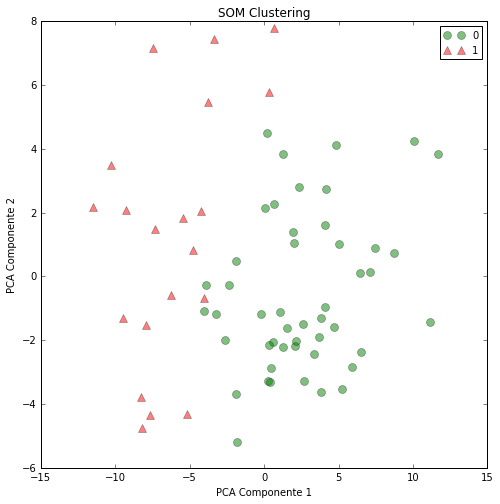

In [47]:
scaler = StandardScaler()
X_A = scaler.fit_transform(X_A)

pca = PCA(n_components=2)
newdataPCA_A = pca.fit_transform(X_A)  # concatenates vectors row by row
dfA=ApatientsDF.copy() 
dfA['PCA_x'] = newdataPCA_A.T[0]
dfA['PCA_y'] = newdataPCA_A.T[1]
dfA['cluster'] = labels

loadingADHD_Data.plotCluster_matPlot(df,'PCA_x','PCA_y','cluster','SOM Clustering')
dfA.to_csv('somApatients.csv', sep=',', encoding='utf-8')

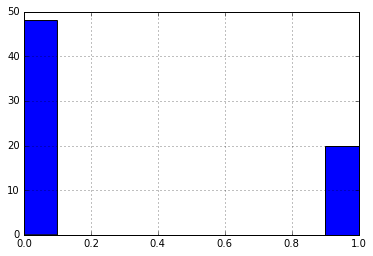

In [48]:
dfA['cluster'].hist()

In [52]:
dfA[["PCA_x","PCA_y"]].head()

,PCA_x,PCA_y
0,-9.316071,2.086899
1,-3.745638,5.466005
2,0.645384,2.287421
3,-4.036546,-1.076673
4,-2.660355,-1.977821


### Calculating SOM for group B patients


In [38]:
### 1. Get best model for A patients
X_B = dropBpatientsDF.values

## Normalising data
#scaler = StandardScaler()
#X_A = scaler.fit_transform(X_A)

mapsize = [50,50]

# Method initialisation
somB = sompy.SOMFactory.build(X_B, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods

# Training of the SOM
somB.train(n_job=1, verbose=None)  # verbose='debug' will print more, and verbose=None wont print anything

# Performing clustering in the projected mapping
clB = somB.cluster(n_clusters=2)

# Projecting the input Data in the Trained SOM
projectedB=somB.project_data(X_B)

# Extrating cluster labels for the inputs, from the projected data
labelsB = cl[projectedB]


### Visualising the Mapping in the network

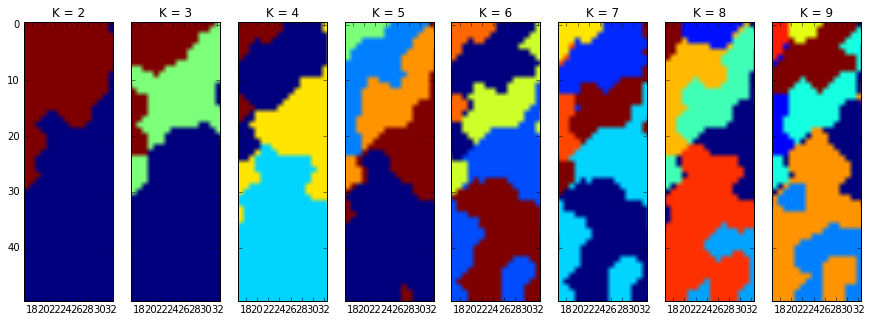

In [39]:
fig = plt.figure()
k_range = 10
N_plots = len(np.arange(2, k_range))
f,ax = plt.subplots(1, N_plots , sharey=True,figsize=(15,5))
for K in np.arange(2, k_range):
    # Perform clustering in the projected mapping
    cl_B = somB.cluster(n_clusters=K)
    ax[K-2].set_title("K = %s"%K)
    ax[K-2].imshow(cl_B.reshape(50,50))
    

plt.show() 

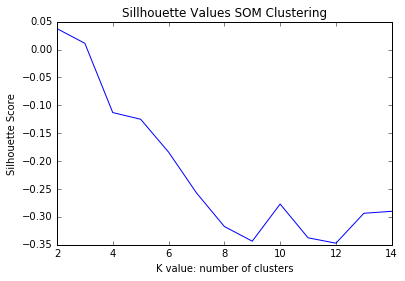

In [40]:
#print(metrics.silhouette_score(X_A, labels_3,  metric='euclidean'))
silhouette = []
for K in np.arange(2, 15):
    
    # Perform clustering in the projected mapping
    clB = somB.cluster(n_clusters=K)

    # Projecting the input Data in the Trained SOM
    projected_=som.project_data(X_B)

    # Extrating cluster labels for the inputs, from the projected data
    labels_ = clB[projected_]
    
    m = metrics.silhouette_score(X_B, labels_, metric='euclidean')
    silhouette.append(m)
    #print('K = ', K)
    #print('Silhouette %.2f' % m)

plt.plot(np.arange(2,15),np.array(silhouette),color='b')
plt.title("Sillhouette Values SOM Clustering")
plt.xlabel("K value: number of clusters")
plt.ylabel("Silhouette Score")

### Ploting the SOM clustering in the training data with PCA 2 components 

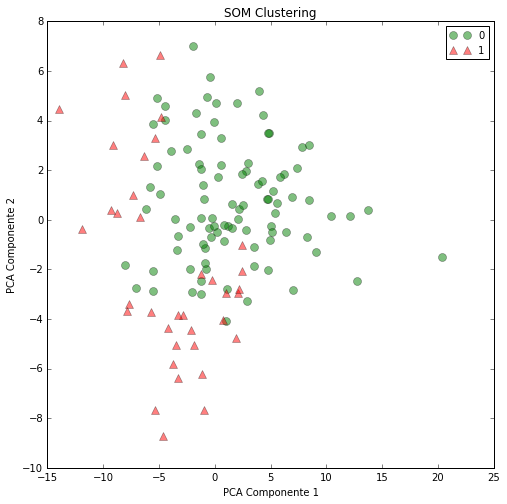

In [41]:
scaler = StandardScaler()
X_B = scaler.fit_transform(X_B)

pca = PCA(n_components=2)
newdataPCA_B = pca.fit_transform(X_B)  # concatenates vectors row by row

dfB=BpatientsDF.copy() 
dfB['PCA_x'] = newdataPCA_B.T[0]
dfB['PCA_y'] = newdataPCA_B.T[1]
dfB['cluster'] = labelsB

loadingADHD_Data.plotCluster_matPlot(dfB,'PCA_x','PCA_y','cluster','SOM Clustering')
dfB.to_csv('somBpatients.csv', sep=',', encoding='utf-8')

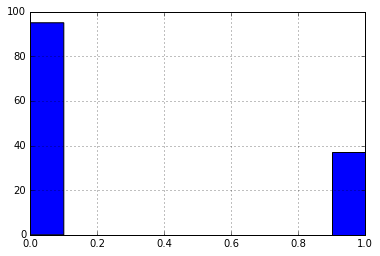

In [49]:
dfB['cluster'].hist()

### Calculating SOM for group C patients


In [42]:
### 1. Get best model for A patients
X_C = dropCpatientsDF.values

## Normalising data
#scaler = StandardScaler()
#X_A = scaler.fit_transform(X_A)

mapsize = [50,50]

# Method initialisation
somC = sompy.SOMFactory.build(X_C, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods

# Training of the SOM
somC.train(n_job=1, verbose=None)  # verbose='debug' will print more, and verbose=None wont print anything

# Performing clustering in the projected mapping
clC = somC.cluster(n_clusters=2)

# Projecting the input Data in the Trained SOM
projectedC = somB.project_data(X_C)

# Extrating cluster labels for the inputs, from the projected data
labelsC = clC[projectedC]

### Visualising the Mapping in the network


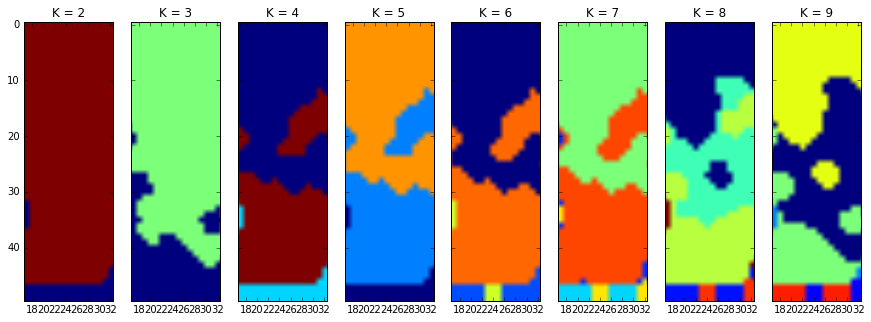

In [43]:
fig = plt.figure()
k_range = 10
N_plots = len(np.arange(2, k_range))
f,ax = plt.subplots(1, N_plots , sharey=True,figsize=(15,5))
for K in np.arange(2, k_range):
    # Perform clustering in the projected mapping
    cl_C = somC.cluster(n_clusters=K)
    ax[K-2].set_title("K = %s"%K)
    ax[K-2].imshow(cl_C.reshape(50,50))
    

plt.show() 

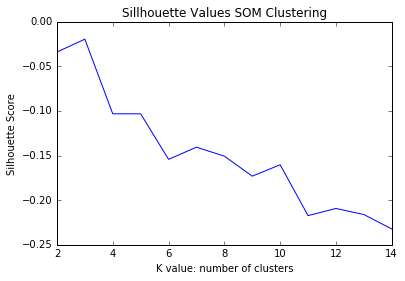

In [44]:
#print(metrics.silhouette_score(X_A, labels_3,  metric='euclidean'))
silhouette = []
for K in np.arange(2, 15):
    
    # Perform clustering in the projected mapping
    clC = somC.cluster(n_clusters=K)

    # Projecting the input Data in the Trained SOM
    projected_C=som.project_data(X_C)

    # Extrating cluster labels for the inputs, from the projected data
    labelsC = clC[projected_C]
    
    m = metrics.silhouette_score(X_C, labelsC, metric='euclidean')
    silhouette.append(m)
    #print('K = ', K)
    #print('Silhouette %.2f' % m)

plt.plot(np.arange(2,15),np.array(silhouette),color='b')
plt.title("Sillhouette Values SOM Clustering")
plt.xlabel("K value: number of clusters")
plt.ylabel("Silhouette Score")

### Ploting the SOM clustering in the training data with PCA 2 components 

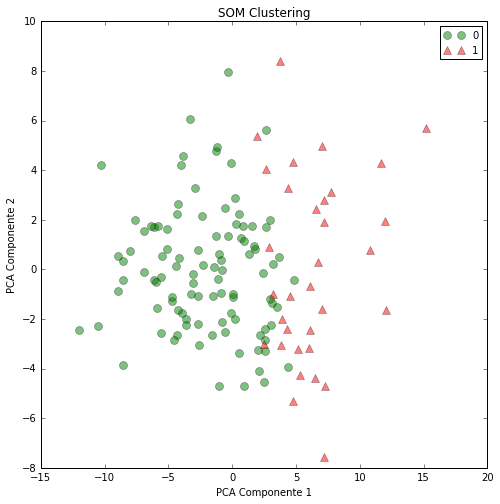

In [45]:
# Performing clustering in the projected mapping
clC = somC.cluster(n_clusters=2)

# Projecting the input Data in the Trained SOM
projectedC = somC.project_data(X_C)

# Extrating cluster labels for the inputs, from the projected data
labelsC = clC[projectedC]

scaler = StandardScaler()
X_C = scaler.fit_transform(X_C)

pca = PCA(n_components=2)
newdataPCA_C = pca.fit_transform(X_C)  # concatenates vectors row by row

dfC=CpatientsDF.copy() 
dfC['PCA_x'] = newdataPCA_C.T[0]
dfC['PCA_y'] = newdataPCA_C.T[1]
dfC['cluster'] = labelsC

loadingADHD_Data.plotCluster_matPlot(dfC,'PCA_x','PCA_y','cluster','SOM Clustering')
dfC.to_csv('somCpatients.csv', sep=',', encoding='utf-8')

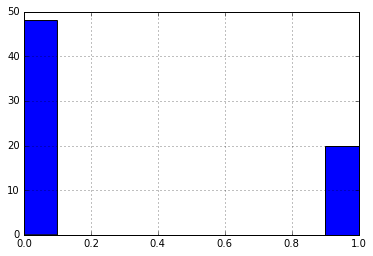

In [50]:
df['cluster'].hist()

In [54]:
pwd

'/Users/and_ma/Documents/DataScience/UB_DataScience/DataScience_Project/gitHub/ADHD_Project/UnsupervisedLearning'